In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dropout, Dense

In [2]:
train_data=pd.read_csv('fashion-mnist_train.csv')
test_data=pd.read_csv('fashion-mnist_test.csv')

In [3]:
train_data.head()

,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,2,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,9,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,6,0,0,0,0,0,0,0,5,0,...,0,0,0,30,43,0,0,0,0,0
3,0,0,0,0,1,2,0,0,0,0,...,3,0,0,0,0,1,0,0,0,0
4,3,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [4]:
test_data.head()

,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,0,0,0,0,0,0,0,0,9,8,...,103,87,56,0,0,0,0,0,0,0
1,1,0,0,0,0,0,0,0,0,0,...,34,0,0,0,0,0,0,0,0,0
2,2,0,0,0,0,0,0,14,53,99,...,0,0,0,0,63,53,31,0,0,0
3,2,0,0,0,0,0,0,0,0,0,...,137,126,140,0,133,224,222,56,0,0
4,3,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [5]:
train_data.shape

(60000, 785)

In [6]:
test_data.shape

(10000, 785)

In [8]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 60000 entries, 0 to 59999
Columns: 785 entries, label to pixel784
dtypes: int64(785)
memory usage: 359.3 MB


In [9]:
test_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Columns: 785 entries, label to pixel784
dtypes: int64(785)
memory usage: 59.9 MB


In [11]:
x_train=train_data.iloc[:,1:].to_numpy()
x_train=x_train.reshape([-1,28,28,1])
x_train=x_train/255

In [18]:
y_train=train_data.iloc[:,0].to_numpy()

In [13]:
x_test=test_data.iloc[:,1:].to_numpy()
x_test=x_test.reshape([-1,28,28,1])
x_test=x_test/255

In [19]:
y_test=test_data.iloc[:,0].to_numpy()

In [15]:
model=Sequential()
model.add(Conv2D(128, kernel_size=(3,3), activation='relu', input_shape=(28,28,1)))
model.add(MaxPooling2D())
model.add(Flatten())
model.add(Dropout(0.2))
model.add(Dense(128,activation='relu'))
model.add(Dense(10,activation='softmax'))
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy',metrics=['accuracy'])

c:\Users\ASUS\anaconda3\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [16]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 26, 26, 128)    │         1,280 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 13, 13, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 21632)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 21632)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │     2,769,024 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 10)             │         1,290 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 2,771,594 (10.57 MB)

 Trainable params: 2,771,594 (10.57 MB)

 Non-trainable params: 0 (0.00 B)

In [20]:
model.fit(x_train,y_train,epochs=5)

Epoch 1/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 74s 38ms/step - accuracy: 0.8199 - loss: 0.5019
Epoch 2/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 72s 38ms/step - accuracy: 0.9038 - loss: 0.2637
Epoch 3/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 72s 39ms/step - accuracy: 0.9214 - loss: 0.2151
Epoch 4/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 73s 39ms/step - accuracy: 0.9315 - loss: 0.1803
Epoch 5/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 74s 39ms/step - accuracy: 0.9428 - loss: 0.1533


In [21]:
metrics=model.evaluate(x_test,y_test)
print('Model Accuracy on Test Set : ',(metrics[1]*100),'%.')

313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - accuracy: 0.9188 - loss: 0.2320
Model Accuracy on Test Set :  92.40999817848206 %.


In [22]:
class_names=['Tshirt','Trouser','Pullover','Dress','Coat','Sandal','Shirt','Sneaker','Bag','Ankle Boots']

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 84ms/step
Predicted Label :  Tshirt
Actual_Label :  Tshirt
Correct Prediction


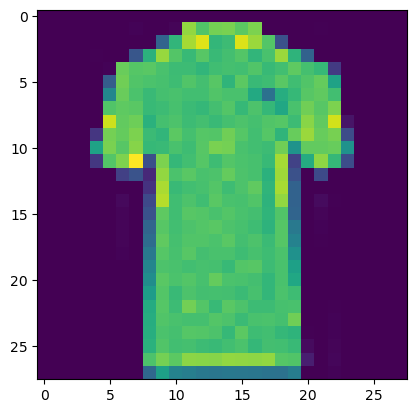

In [24]:
image_index=1345
prediction=model.predict(x_test[image_index:image_index+1])
prediction_label=np.argmax(prediction)
true_label=y_test[image_index]
print('Predicted Label : ',class_names[prediction_label])
print('Actual_Label : ',class_names[true_label])

if(prediction_label==true_label):
    print('Correct Prediction')
else:
    print('Incorrect Prediction')
plt.imshow(x_test[image_index:image_index+1][0])

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 66ms/step
Predicted Label :  Coat
Actual_Label :  Coat
Correct Prediction


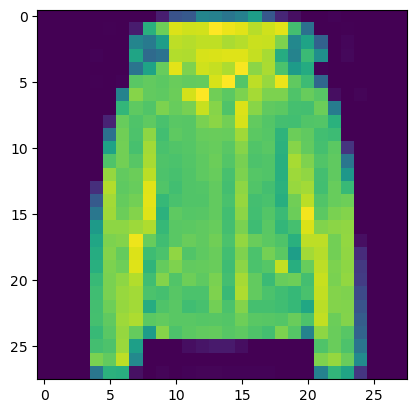

In [25]:
image_index=1234
prediction=model.predict(x_test[image_index:image_index+1])
prediction_label=np.argmax(prediction)
true_label=y_test[image_index]
print('Predicted Label : ',class_names[prediction_label])
print('Actual_Label : ',class_names[true_label])

if(prediction_label==true_label):
    print('Correct Prediction')
else:
    print('Incorrect Prediction')
plt.imshow(x_test[image_index:image_index+1][0])

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 108ms/step
Predicted Label :  Bag
Actual_Label :  Bag
Correct Prediction


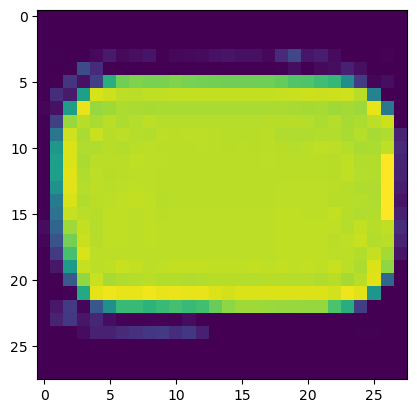

In [26]:
image_index=9918
prediction=model.predict(x_test[image_index:image_index+1])
prediction_label=np.argmax(prediction)
true_label=y_test[image_index]
print('Predicted Label : ',class_names[prediction_label])
print('Actual_Label : ',class_names[true_label])

if(prediction_label==true_label):
    print('Correct Prediction')
else:
    print('Incorrect Prediction')
plt.imshow(x_test[image_index:image_index+1][0])

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 62ms/step
Predicted Label :  Shirt
Actual_Label :  Shirt
Correct Prediction


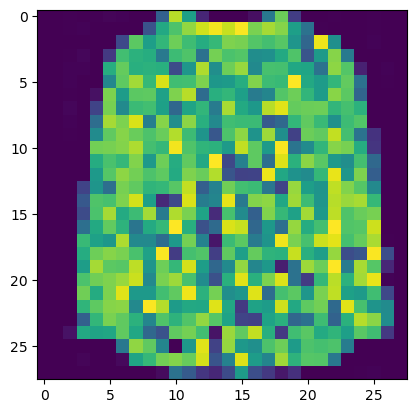

In [27]:
image_index=9913
prediction=model.predict(x_test[image_index:image_index+1])
prediction_label=np.argmax(prediction)
true_label=y_test[image_index]
print('Predicted Label : ',class_names[prediction_label])
print('Actual_Label : ',class_names[true_label])

if(prediction_label==true_label):
    print('Correct Prediction')
else:
    print('Incorrect Prediction')
plt.imshow(x_test[image_index:image_index+1][0])